HW4
2c

We have assumed that the number of predictors, m, for the random forests is constant and we don't need to compare the results (various relevant results) for different values of m even though it could be done quite simply by using a loop

Total original predictors we have are 170
We will choose m = sqrt(p) = 13 (approximately)

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('aps_train.csv',index_col=0)
df_test = pd.read_csv('aps_test.csv',index_col=0)

print(df_train)
print(df_test)

       class  aa_000    ab_000        ac_000      ad_000  ae_000  af_000  \
0          0   76698  0.000000  2.130706e+09  280.000000     0.0     0.0   
1          0   33058  0.645959  0.000000e+00  638.509566     0.0     0.0   
2          0   41040  0.644207  2.280000e+02  100.000000     0.0     0.0   
3          0      12  0.000000  7.000000e+01   66.000000     0.0    10.0   
4          0   60874  0.035666  1.368000e+03  458.000000     0.0     0.0   
...      ...     ...       ...           ...         ...     ...     ...   
59995      0  153002  0.355823  6.640000e+02  186.000000     0.0     0.0   
59996      0    2286  0.000000  2.130707e+09  224.000000     0.0     0.0   
59997      0     112  0.000000  2.130706e+09   18.000000     0.0     0.0   
59998      0   80292  0.117141  2.130706e+09  494.000000     0.0     0.0   
59999      0   40222  0.001512  6.980000e+02  628.000000     0.0     0.0   

       ag_000  ag_001  ag_002  ...     ee_002    ee_003     ee_004     ee_005  \
0     

In [6]:
X_train = df_train.drop(columns=['class'])
X_test = df_test.drop(columns=['class'])

print(X_train)
print(X_test)

       aa_000    ab_000        ac_000      ad_000  ae_000  af_000  ag_000  \
0       76698  0.000000  2.130706e+09  280.000000     0.0     0.0     0.0   
1       33058  0.645959  0.000000e+00  638.509566     0.0     0.0     0.0   
2       41040  0.644207  2.280000e+02  100.000000     0.0     0.0     0.0   
3          12  0.000000  7.000000e+01   66.000000     0.0    10.0     0.0   
4       60874  0.035666  1.368000e+03  458.000000     0.0     0.0     0.0   
...       ...       ...           ...         ...     ...     ...     ...   
59995  153002  0.355823  6.640000e+02  186.000000     0.0     0.0     0.0   
59996    2286  0.000000  2.130707e+09  224.000000     0.0     0.0     0.0   
59997     112  0.000000  2.130706e+09   18.000000     0.0     0.0     0.0   
59998   80292  0.117141  2.130706e+09  494.000000     0.0     0.0     0.0   
59999   40222  0.001512  6.980000e+02  628.000000     0.0     0.0     0.0   

       ag_001  ag_002  ag_003  ...     ee_002    ee_003     ee_004     ee_0

In [7]:
y_train = df_train['class']
y_test = df_test['class']

print(y_train)
print(y_test)

0        0
1        0
2        0
3        0
4        0
        ..
59995    0
59996    0
59997    0
59998    0
59999    0
Name: class, Length: 60000, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
15995    0
15996    0
15997    0
15998    0
15999    0
Name: class, Length: 16000, dtype: int64


In [8]:
forest = RandomForestClassifier(n_estimators=100,max_features='sqrt',bootstrap=True,oob_score=True) # draws all samples 
                                                                                                    # from train
forest_fit = forest.fit(X_train,y_train)
y_train_predicted = forest_fit.predict(X_train)
y_test_predicted = forest_fit.predict(X_test)

print(y_train_predicted)
print(y_train)

print(y_test_predicted)
print(y_test)

[0 0 0 ... 0 0 0]
0        0
1        0
2        0
3        0
4        0
        ..
59995    0
59996    0
59997    0
59998    0
59999    0
Name: class, Length: 60000, dtype: int64
[0 0 0 ... 0 0 0]
0        0
1        0
2        0
3        0
4        0
        ..
15995    0
15996    0
15997    0
15998    0
15999    0
Name: class, Length: 16000, dtype: int64


The above outputs show the predicted arrays for class above the true class series for train and test set respectively, obtained via the forest

Out of Bag and Test Errors

In [10]:
test_error = (1-forest_fit.score(X_test, y_test))*100
oob_error = (1-forest_fit.oob_score_)*100

print('Test error is : \n',test_error,'%')
print('oob error is : \n',oob_error,'%')

Test error is : 
 0.7499999999999951 %
oob error is : 
 0.6283333333333307 %


As can be seen, the errors in % are less than 1 and are extremely low. In general due to the class imbalance being as bad as 2% this is expected, as even if we classify all samples to 0, the error would still be less than 2% as we have such large class imbalance

The oob error, obtained above, does a decent job of estimating the test error but still somewhat underestimates it

Next, to get an idea of how good our classifier is, we get its Confusion Matrix

Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix

conf_train = confusion_matrix(y_train,y_train_predicted)
conf_test = confusion_matrix(y_test,y_test_predicted)

print(conf_train)
print(conf_test)

[[59000     0]
 [    1   999]]
[[15609    16]
 [  104   271]]


The confusion matrix are as shown above
00 True Negative
10 False Negative
11 True Positive
01 False Positive

In [13]:
index_row = ['Actually 0','Actually 1']
header_col = ['Predicted 0','Predicted 1']

train_conf = pd.DataFrame(conf_train,index=index_row,columns=header_col)
test_conf = pd.DataFrame(conf_test,index=index_row,columns=header_col)

print('Training Confusion is : \n',train_conf)
print('Test Confusion is : \n',test_conf)

Training Confusion is : 
             Predicted 0  Predicted 1
Actually 0        59000            0
Actually 1            1          999
Test Confusion is : 
             Predicted 0  Predicted 1
Actually 0        15609           16
Actually 1          104          271


Focusing on Test,
Almost all true 0's are correctly classified as 0's
Quite a few true 1's are predicted/classified as 0's

Ratio of (actually 1, predicted 1) to (total true 1's in test) is :

271/(271+104) = 72.2 %
Thus approximately 72 % of all 1's in the test set are correctly predicted as 1, rest are predicted as 0

ROC Curve

In [31]:
threshold_range = np.arange(0,1.01,0.01)
pointer = np.arange(0,np.size(threshold_range))
y_test_prob = forest_fit.predict_proba(X_test)
y_test_prob_0 = y_test_prob[:,0]
ROC_df = pd.DataFrame(index=np.arange(0,np.size(threshold_range)),columns=['TPR','FPR'])

i=0
for i in pointer:
    y_test_predicted_new = (y_test_prob_0 <= threshold_range[i]).astype(int)
    conf_test_new = confusion_matrix(y_test,y_test_predicted_new)
    TPR = conf_test_new[1][1]/(conf_test_new[1][1]+conf_test_new[1][0])
    FPR = conf_test_new[0][1]/(conf_test_new[0][1]+conf_test_new[0][0])
    ROC_df.iloc[i,0]=TPR
    ROC_df.iloc[i,1]=FPR    
    
print(ROC_df)

            TPR       FPR
0    0.00266667         0
1     0.0106667         0
2     0.0186667         0
3         0.032         0
4     0.0453333         0
..          ...       ...
96     0.978667  0.034112
97        0.984   0.04096
98     0.994667  0.052992
99     0.994667   0.09184
100           1         1

[101 rows x 2 columns]


Threshold = index/100
Also as class imbalance is extreme, we have FPR suddenly rising to 1 when threshold is 1 as the probability of being in class 0 is too high (close to being 1 in quite a few cases)

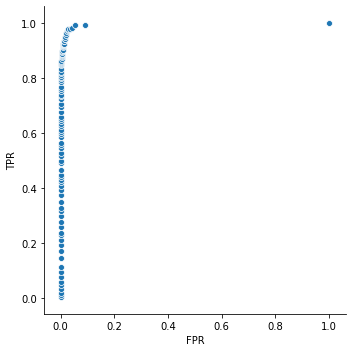

In [32]:
sns.relplot(data=ROC_df,x='FPR',y='TPR')

This is test ROC
As can be seen it follows typical ROC curve, also jump to 1,1 is immediate from the FPR point of view

ROC Train

In [33]:
y_train_prob = forest_fit.predict_proba(X_train)
y_train_prob_0 = y_train_prob[:,0]
ROC_train_df = pd.DataFrame(index=np.arange(0,np.size(threshold_range)),columns=['TPR','FPR'])

i=0
for i in pointer:
    y_train_predicted_new = (y_train_prob_0 <= threshold_range[i]).astype(int)
    conf_train_new = confusion_matrix(y_train,y_train_predicted_new)
    TPR = conf_train_new[1][1]/(conf_train_new[1][1]+conf_train_new[1][0])
    FPR = conf_train_new[0][1]/(conf_train_new[0][1]+conf_train_new[0][0])
    ROC_train_df.iloc[i,0]=TPR
    ROC_train_df.iloc[i,1]=FPR    
    
print(ROC_train_df)

       TPR        FPR
0    0.031          0
1    0.054          0
2    0.098          0
3    0.146          0
4    0.199          0
..     ...        ...
96       1  0.0196441
97       1  0.0244407
98       1  0.0336271
99       1  0.0615763
100      1          1

[101 rows x 2 columns]


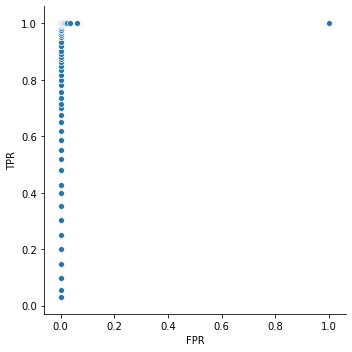

In [34]:
sns.relplot(data=ROC_train_df,x='FPR',y='TPR')

Comparing ROC curves for Train and Test, Train ROC implies a much better model than Test, even though test implies a pretty good model (based on area under the ROC curve)

AUC Values

In [35]:
from sklearn import metrics

auc_test = metrics.auc(ROC_df['FPR'],ROC_df['TPR'])

print('The test AUC is : \n', auc_test)

The test AUC is : 
 0.9946333013333334


In [36]:
auc_train = metrics.auc(ROC_train_df['FPR'],ROC_train_df['TPR'])

print('The train AUC is : \n', auc_train)

The train AUC is : 
 1.0


As can be seen train AUC is 1, and test AUC is pretty close to 1. Thus despite the fact that only 72 % positive imbalanced class members have been correctly classified, this model is pretty good given the extremely imbalanced dataset.

Train and Test Misclassification

In [38]:
train_mis = 0
for i in np.arange(0,60000):
    if y_train_predicted[i] != y_train[i]:
        train_mis = train_mis + 1

test_mis = 0
for i in np.arange(0,16000):
    if y_test_predicted[i] != y_test[i]:
        test_mis = test_mis + 1
        
print('Misclassification for Training set out of 60000 is : \n',train_mis)
print('Misclassification for Test set out of 16000 is : \n',test_mis)

Misclassification for Training set out of 60000 is : 
 1
Misclassification for Test set out of 16000 is : 
 120


Conclusion :
Other than issue of only 72 % class 1 samples being correctly predicted (test data), the model does seem a good one. Additionally for an imbalance of 2% without utilizing any class balancing technique, this might be the best one could expect a model to perform